In [1]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import RobustScaler
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from statistics import mean,stdev

In [2]:
# Read wine_data.csv using pandas library (pd object)
df = None

In [3]:
# group wines by class and provide the size of each group
# i.e. how many wines of each type there are in the dataset
None

class
1    59
2    71
3    48
dtype: int64

<AxesSubplot:xlabel='class', ylabel='count'>

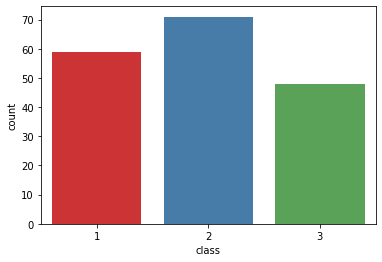

In [4]:
# provide a seaborn countplot on the class column; use the Set1 palette
None

In [5]:
# print basic statistics per feature
None

class     alcohol  malic_acid         ash  alcalinity_of_ash  \
count  178.000000  178.000000  178.000000  178.000000         178.000000   
mean     1.938202   13.000618    2.336348    2.366517          19.494944   
std      0.775035    0.811827    1.117146    0.274344           3.339564   
min      1.000000   11.030000    0.740000    1.360000          10.600000   
25%      1.000000   12.362500    1.602500    2.210000          17.200000   
50%      2.000000   13.050000    1.865000    2.360000          19.500000   
75%      3.000000   13.677500    3.082500    2.557500          21.500000   
max      3.000000   14.830000    5.800000    3.230000          30.000000   

        magnesium  total_phenols  flavanoids  nonflavanoid_phenols  \
count  178.000000     178.000000  178.000000            178.000000   
mean    99.741573       2.295112    2.029270              0.361854   
std     14.282484       0.625851    0.998859              0.124453   
min     70.000000       0.980000    0.340000              0.130000   
25%     88.000000       1.742500    1.205000              0.270000   
50%     98.000000       2.355000    2.135000              0.340000   
75%    107.000000       2.800000    2.875000              0.437500   
max    162.000000       3.880000    5.080000              0.660000   

       proanthocyanins  color_intensity         hue  \
count       178.000000       178.000000  178.000000   
mean          1.590899         5.058090    0.957449   
std           0.572359         2.318286    0.228572   
min           0.410000         1.280000    0.480000   
25%           1.250000         3.220000    0.782500   
50%           1.555000         4.690000    0.965000   
75%           1.950000         6.200000    1.120000   
max           3.580000        13.000000    1.710000   

       OD280/OD315_of_diluted_wines      proline  
count                    178.000000   178.000000  
mean                       2.611685   746.893258  
std                        0.709990   314.907474  
min                        1.270000   278.000000  
25%                        1.937500   500.500000  
50%                        2.780000   673.500000  
75%                        3.170000   985.000000  
max                        4.000000  1680.000000

In [6]:
# extract the features and the target variable
X = None    # features (all rows, from the second to the last column)
y = None    # target (all rows, only first column)

best combination (ACC: 0.983): (0, 1, 4, 5, 6, 9, 12)



(<Figure size 432x432 with 1 Axes>,
 <AxesSubplot:xlabel='Number of Features', ylabel='Performance'>)

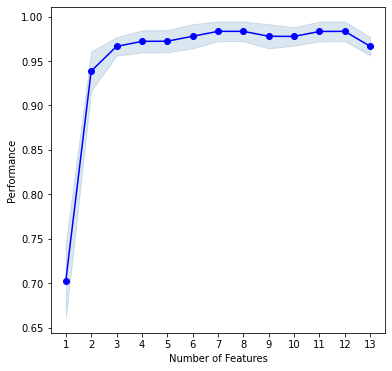

In [7]:
# create a Random Forest Classifier object with default values
rfc = None

# run sequential forward selection from 1 to 13 features (floating = False, scoring = accuracy, cv = 5)
# QUESTION: Why accuracy is a good measure measure for this dataset?
# ANSWER: Please provide your answer here
sfs_range = SFS(estimator=None, 
           k_features=None,
           forward=None, 
           floating=None, 
           scoring=None,
           cv=None)

# train the sequential forward selection object
None

# print the accuracy of the best combination as well as the set of best features
print('best combination (ACC: %.3f): %s\n' % (sfs_range.k_score_, sfs_range.k_feature_idx_))

plt.rcParams["figure.figsize"] = (6,6)
# use the plot_sfs to visualize all accuracies
plot_sfs(sfs_range.get_metric_dict(), kind='std_err')

In [8]:
# keep the most important features from X dataset that maximize the accuracy
# Generate (transform) the new subsets based on the selected features
X_sfs = None

In [9]:
# Split X_sfs and y datasets into: training dataset - 80%, test - 20%; set random_state param to 0
X_train, X_test, y_train, y_test = None

In [10]:
# perform grid search CV on a number of classifiers to find the best along with the set of
# its best parameters

# names list is used for printing results purposes
names = [
         "Decision Tree",
         "Random Forest",
         "Ada Boost",
         "Gradient Boosting",
         "K Nearest Neighbors",
         "Gaussian Naive Bayes",
         "Support Vector Machines"
]

classifiers = [
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    KNeighborsClassifier(),
    GaussianNB(),
    SVC()
]

parameters = [
              {'criterion': ['gini', 'entropy'], 'max_depth': [10,20,50]},
              {'n_estimators': [200, 500, 750], 'max_features': ['sqrt', 'log2'], 
               'max_depth' : [2,3,4], 'criterion' :['gini', 'entropy']},
              {'learning_rate': [0.001, 0.01, 0.025], 'n_estimators': [100, 500, 750]},
              {'learning_rate': [0.001, 0.01, 0.025], 'max_depth':[3,4],
               'max_features': ["log2","sqrt"], 'subsample': [0.8, 0.9, 1.0],
               'n_estimators': [100, 500, 750]},
              {'n_neighbors': [1, 2, 3, 5]},
              {'var_smoothing': np.logspace(0,-9, num=100)},
              {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],
               'kernel': ['rbf', 'poly', 'sigmoid']}
]

# print results
for name, classifier, params in zip(names, classifiers, parameters):
    gs = GridSearchCV(classifier, param_grid=params, scoring='accuracy', n_jobs=-1)
    gs.fit(X_train, y_train)
    print("{} score: {} - best params: {}".format(name, gs.best_score_, gs.best_params_))

Decision Tree score: 0.9576354679802955 - best params: {'criterion': 'gini', 'max_depth': 10}
Random Forest score: 0.9862068965517242 - best params: {'criterion': 'gini', 'max_depth': 2, 'max_features': 'auto', 'n_estimators': 200}
Ada Boost score: 0.9650246305418719 - best params: {'learning_rate': 0.01, 'n_estimators': 500}
Gradient Boosting score: 0.993103448275862 - best params: {'learning_rate': 0.001, 'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 750, 'subsample': 0.8}
K Nearest Neighbors score: 0.767487684729064 - best params: {'n_neighbors': 1}
Gaussian Naive Bayes score: 0.9578817733990148 - best params: {'var_smoothing': 1.5199110829529332e-05}
Support Vector Machines score: 0.9652709359605911 - best params: {'C': 0.1, 'gamma': 1, 'kernel': 'poly'}


In [12]:
# create a model involving the estimator along with its best parameters obtained by the 
# process above
None
# train the model
None
# predict the output of the X_test dataset
y_pred = None
# print the accuracy of the model on the unseen data
print("Final accuracy on unseen data:", accuracy_score(y_pred, y_test))

Final accuracy on unseen data: 1.0
